# Manipulação dos dados e EDA - DELITOS NYC - 2020

[dataset NY] https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

 - Link do site onde encontra-se o dataset
 
 url:https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
# visualizando as 5 primeiras linhas do dataset
df[0:5]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,218375425,09/26/2020,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,M,1,0,25-44,M,WHITE,982285,201682,40.720255,-74.007090,POINT (-74.00709027999993 40.72025522300004)
1,217319714,09/02/2020,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,M,5,0,18-24,F,BLACK,983903,200257,40.716344,-74.001253,POINT (-74.00125319299997 40.71634415200003)
2,218282529,09/24/2020,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,M,34,0,45-64,M,BLACK,1003633,253391,40.862161,-73.929927,POINT (-73.92992712599995 40.862161439000026)
3,217526617,09/07/2020,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1003029,176696,40.651655,-73.932325,POINT (-73.93232493699998 40.65165467100008)
4,218518385,09/29/2020,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,K,66,0,18-24,M,BLACK,988164,170927,40.635839,-73.985899,POINT (-73.98589935799998 40.635839049000026)


## 2- Preparaçao dos dados


 - Removendo as colunas que nao serão utilizadas 

In [4]:
select_ny=df.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE','ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD','New Georeferenced Column'], axis=1)

In [5]:
#  Renomeando as colunas

select_ny.columns = ['data_da_ocorrencia','descricao_da_ofensa','nivel_da_ofensa','bairro'
                     ,'idade_do_infrator','sexo_do_infrator','raca_do_infrator','latitude','longitude']

In [6]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    date_time_obj = datetime.datetime.strptime(date, '%m/%d/%Y')
    return weekday_dict[date_time_obj.weekday()]

date = select_ny['data_da_ocorrencia'].str.split("/", n = 3, expand = True)
select_ny['ano'] = date[2].astype('int32')
select_ny['dia'] = date[1].astype('int32')
select_ny['mes'] = date[0].astype('int32')
select_ny['dia_da_semana'] = select_ny['data_da_ocorrencia'].apply(date_to_weekday)

# alterando os dados da coluna nivel_de_ofensa

new_nivel_da_ofensa = {'M': "contravencao", 'F': "crime", 'V': "violacao",'I':"outro" }
select_ny['nivel_da_ofensa'] = select_ny['nivel_da_ofensa'].map(new_nivel_da_ofensa)

# alterando os dados da coluna bairro

new_bairro = {'B': 'Bronx', 'S': 'Staten_Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens' }
select_ny['bairro'] = select_ny['bairro'].map(new_bairro)

In [7]:
select_ny.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,09/26/2020,RAPE,crime,Manhattan,25-44,M,WHITE,40.720255,-74.007090,2020,26,9,Saturday
1,09/02/2020,FORGERY,crime,Manhattan,18-24,F,BLACK,40.716344,-74.001253,2020,2,9,Wednesday
2,09/24/2020,BURGLARY,crime,Manhattan,45-64,M,BLACK,40.862161,-73.929927,2020,24,9,Thursday
3,09/07/2020,DANGEROUS WEAPONS,crime,Brooklyn,18-24,M,BLACK,40.651655,-73.932325,2020,7,9,Monday
4,09/29/2020,CRIMINAL MISCHIEF & RELATED OF,crime,Brooklyn,18-24,M,BLACK,40.635839,-73.985899,2020,29,9,Tuesday


 - Convertendo a coluna " DATA_DA_OCORRENCIA "para formato datetime

In [8]:
select_ny["data_da_ocorrencia"] = pd.to_datetime(select_ny["data_da_ocorrencia"] )

In [9]:
# select_ny = select_ny[['data_da_ocorrencia', 'data_final_da_ocorrencia', 'data_comunicacao_policia','hora_da_ocorrencia',
#                        'hora_termino_da_ocorrencia','descricao_da_ofensa',
#                        'conclusao', 'nivel_de_ofensa', 'jurisdicao','bairro', 'local_da_ocorrencia', 'descricao_das_intalacoes','latitude','longitude','lat_long']]

# select_ny.head()

## 3.0  Gerando algumas vizualizações de select_ny 

### 3.1- Quantidade de delitos cometidos por bairros
 
 - Delitos_concluidos_por_bairros será o dataframe a ser utilizado neste tópico
 - Selecionando apenas os delitos concluídos

 - Criando o DataFrame delitos_concluidos_por_bairros

In [10]:
delitos_concluidos_por_bairros_df = select_ny.bairro.value_counts().to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'qtde_delitos']

In [11]:
delitos_concluidos_por_bairros_df

,bairro,qtde_delitos
0,Brooklyn,27962
1,Manhattan,24637
2,Bronx,23963
3,Queens,22316
4,Staten_Island,4498


- Visualizando a quantidade de delitos em cada bairro

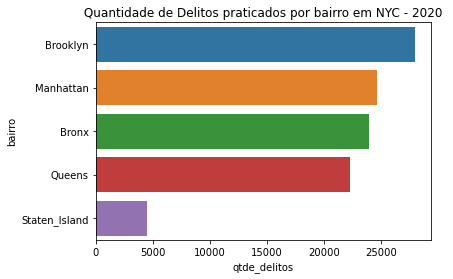

In [12]:
sns.barplot(y = 'bairro' , x = 'qtde_delitos' , data = delitos_concluidos_por_bairros_df)
titulo = ' Quantidade de Delitos praticados por bairro em NYC - 2020 '
plt.title(titulo)
plt.show()

 - Distribuição dos delitos cometidos de acordo com o dia do mes

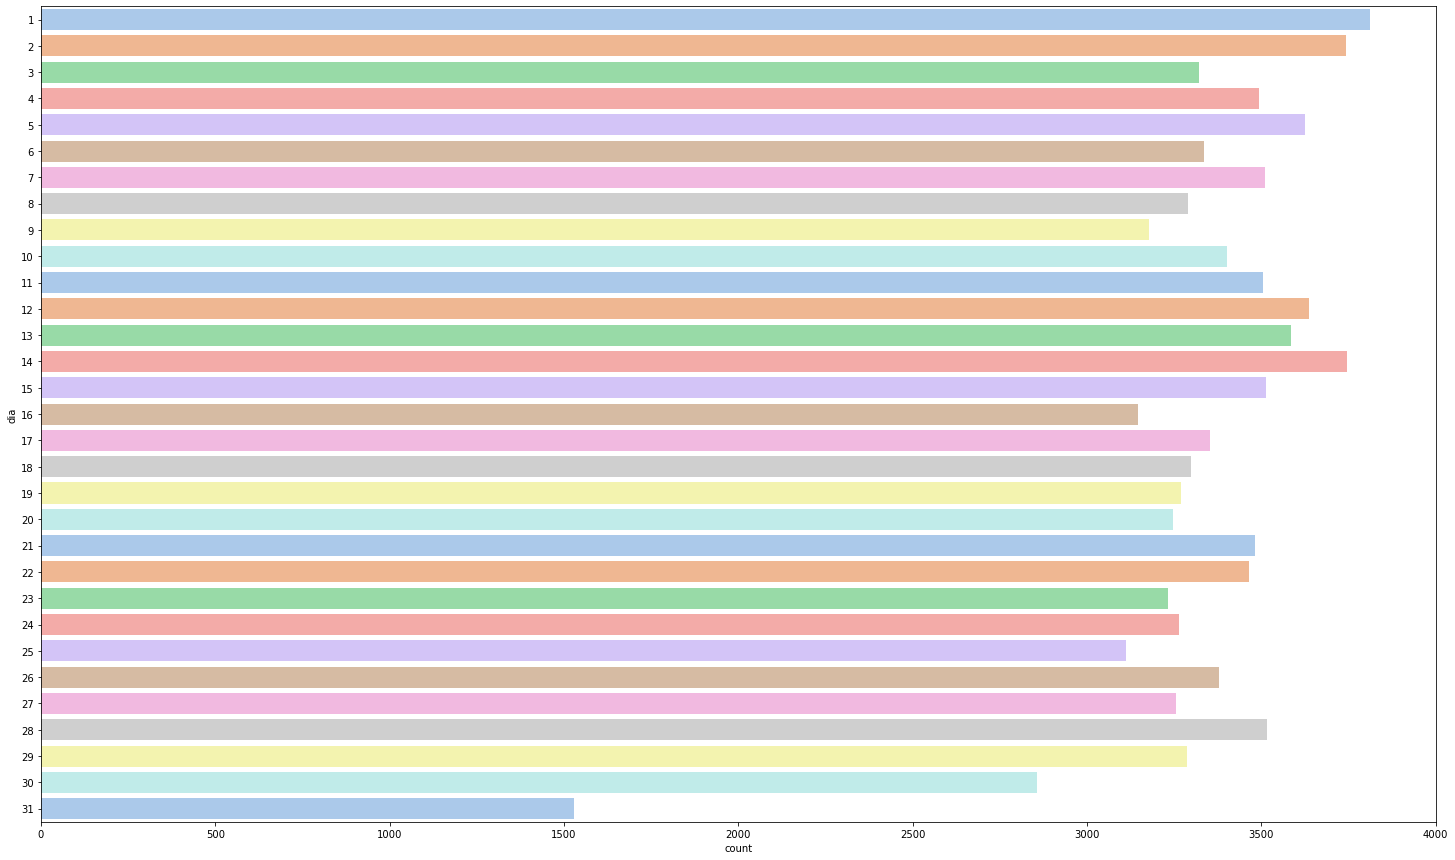

In [13]:
f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(y="dia", data=select_ny,palette="pastel" );

In [14]:
select_ny.shape

(103376, 13)

 - Distribuição dos delitos por mes

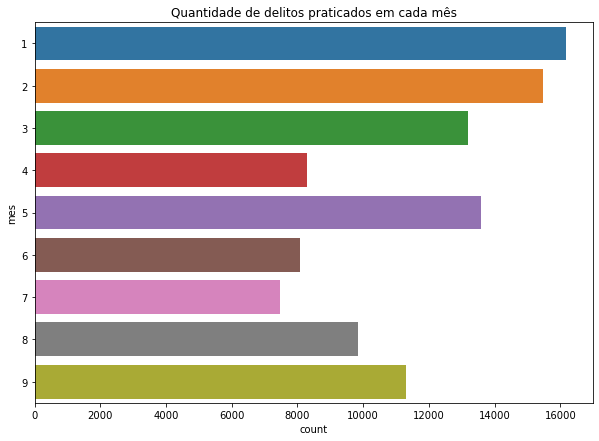

In [15]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="mes", data=select_ny)
titulo='Quantidade de delitos praticados em cada mês'
plt.title(titulo)
plt.show()

### 3.2- Descrição da ofensa :  tipos de delitos mais comuns

In [16]:
tipos_de_delitos = select_ny.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

In [22]:
tipos_de_delitos

,descricao_da_ofensa,quantidade
0,ASSAULT 3 & RELATED OFFENSES,17588
1,FELONY ASSAULT,10002
2,PETIT LARCENY,8540
3,DANGEROUS DRUGS,8263
4,MISCELLANEOUS PENAL LAW,6717
5,ROBBERY,5992
6,CRIMINAL MISCHIEF & RELATED OF,5759
7,BURGLARY,4711
8,GRAND LARCENY,4688
9,DANGEROUS WEAPONS,4646


 - Visualizando os tipos de delitos mais frequentes

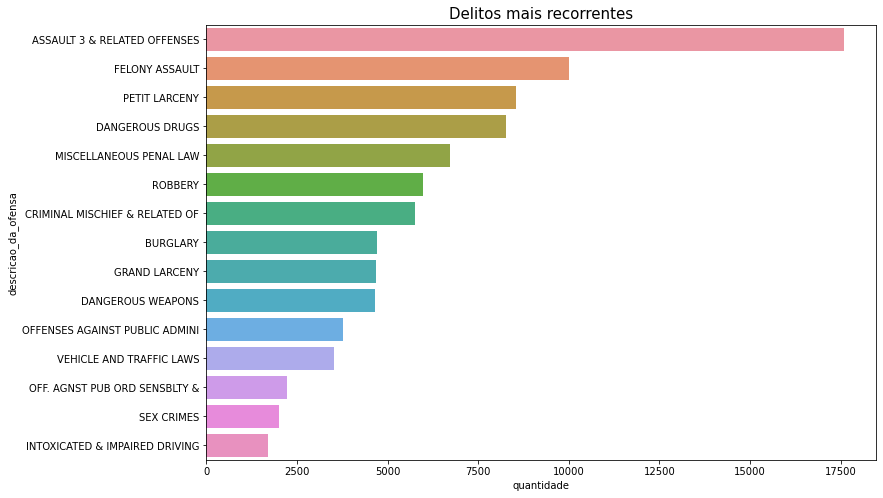

In [26]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y = 'descricao_da_ofensa' , x = 'quantidade' , data = tipos_de_delitos.head(15))
titulo='Delitos mais recorrentes'
plt.title(titulo, fontsize=15)
plt.show()

###  3.3- Visualizando a distribuicao do sexo e raça dos infratores 

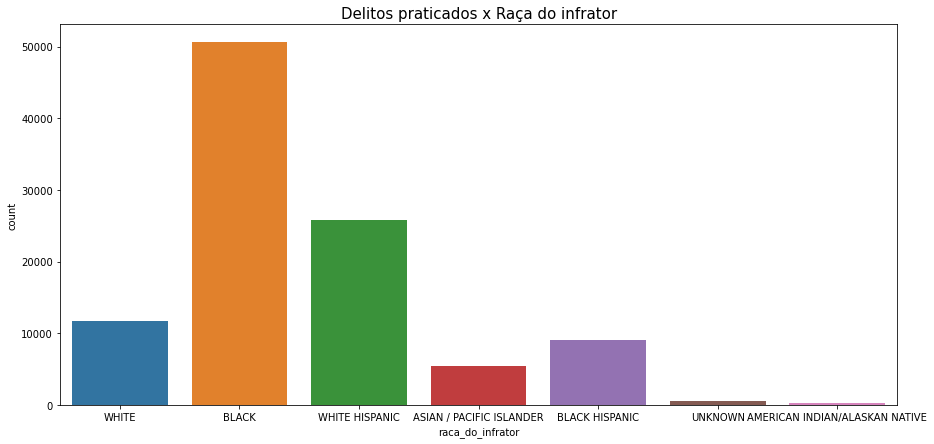

In [27]:
f, ax = plt.subplots(figsize=(15, 7))
sns.countplot( x ="raca_do_infrator", data=select_ny)
titulo ='Delitos praticados x Raça do infrator'
plt.title(titulo, fontsize=15)
plt.show()

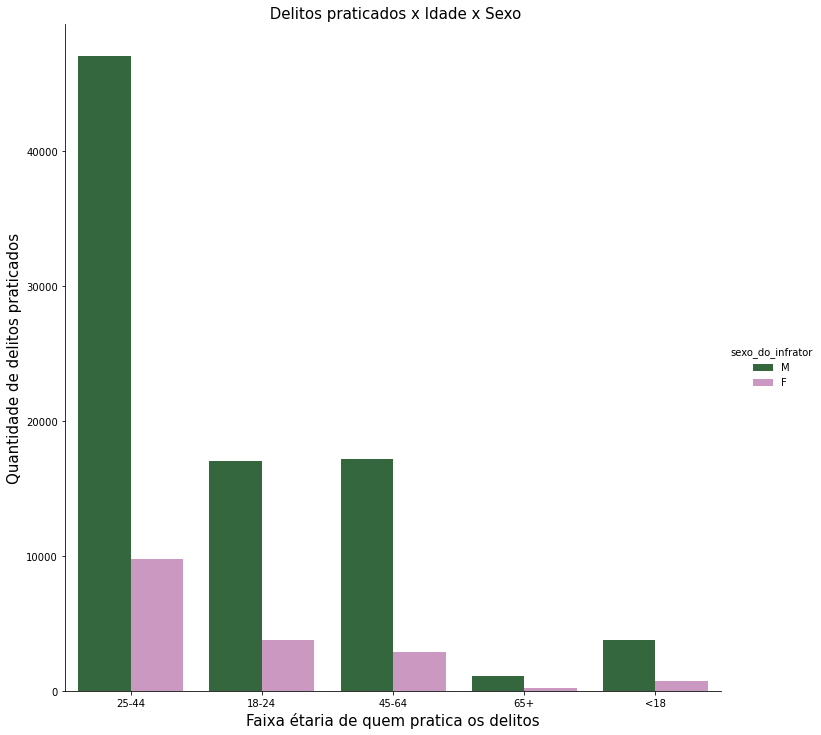

In [28]:
ax = sns.catplot(x="idade_do_infrator", hue="sexo_do_infrator", kind="count",palette="cubehelix", data=select_ny, height=10, aspect=1)
plt.xlabel('Faixa étaria de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Idade x Sexo"
plt.title(titulo, fontsize=15)
plt.show()

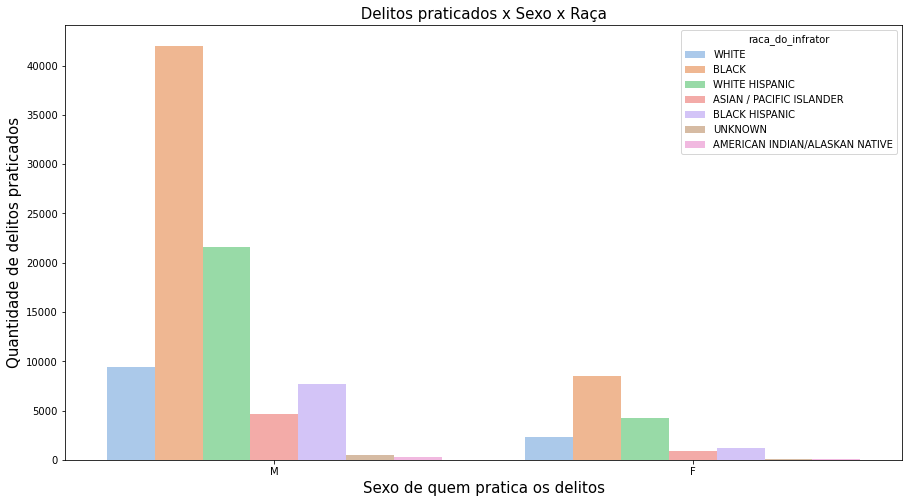

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x="sexo_do_infrator", hue="raca_do_infrator", data=select_ny, palette="pastel")
plt.xlabel('Sexo de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Sexo x Raça "
plt.title(titulo, fontsize=15)
plt.show()

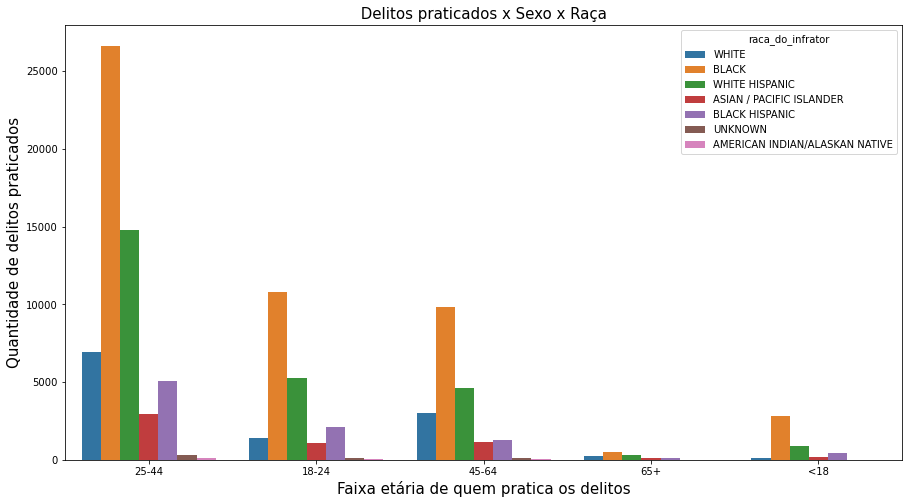

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x='idade_do_infrator', hue='raca_do_infrator', data = select_ny)
plt.xlabel('Faixa etária de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Sexo x Raça "
plt.title(titulo, fontsize=15)
plt.show()

In [31]:
select_ny.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,2020-09-26,RAPE,crime,Manhattan,25-44,M,WHITE,40.720255,-74.007090,2020,26,9,Saturday
1,2020-09-02,FORGERY,crime,Manhattan,18-24,F,BLACK,40.716344,-74.001253,2020,2,9,Wednesday
2,2020-09-24,BURGLARY,crime,Manhattan,45-64,M,BLACK,40.862161,-73.929927,2020,24,9,Thursday
3,2020-09-07,DANGEROUS WEAPONS,crime,Brooklyn,18-24,M,BLACK,40.651655,-73.932325,2020,7,9,Monday
4,2020-09-29,CRIMINAL MISCHIEF & RELATED OF,crime,Brooklyn,18-24,M,BLACK,40.635839,-73.985899,2020,29,9,Tuesday


# 4 - Modelagem

## 4.1 Preparação dos Dados
- Separação Treino/Teste
- Separar Dados de Entrada (Atributos) e de saída (target)
- Tratar colunas categóricas
- Tratar dados ausentes
- Escalar os dados


In [32]:
select_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103376 entries, 0 to 103375
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_da_ocorrencia   103376 non-null  datetime64[ns]
 1   descricao_da_ofensa  103352 non-null  object        
 2   nivel_da_ofensa      102406 non-null  object        
 3   bairro               103376 non-null  object        
 4   idade_do_infrator    103376 non-null  object        
 5   sexo_do_infrator     103376 non-null  object        
 6   raca_do_infrator     103376 non-null  object        
 7   latitude             103376 non-null  float64       
 8   longitude            103376 non-null  float64       
 9   ano                  103376 non-null  int32         
 10  dia                  103376 non-null  int32         
 11  mes                  103376 non-null  int32         
 12  dia_da_semana        103376 non-null  object        
dtypes: datetime64[

 - Criando um dataset apenas com os delitos mais praticados

In [ ]:
ml_dataset=pd.get_dummies(
    select_ny,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=['bairro','sexo_do_infrator','raca_do_infrator','dia_da_semana'],
    sparse=False,
    drop_first=False,
    dtype=None,
)

 - Variáveis que podem servir como classificadores os delitos pelo nivel da ofensa.
  - lat e long
  - raça
  - dia da semana , mes , dia 

In [ ]:
del(ml_dataset)

In [ ]:
ml_dataset = ml_dataset.drop(columns=['descricao_da_ofensa','local_da_prisao','georeferencia','ano','data_da_ocorrencia'])

In [ ]:
pd.set_option('display.max_columns', 500)
ml_dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test= train_test_split(ml_dataset, test_size=0.25 , random_state=123)

In [ ]:
lista_cols = list(ml_dataset.columns)

In [ ]:
X_cols =

y_cols =

In [ ]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]